## Layers

Neural networks typically organize their neurons into layers. 

When we collect together linear units having a common set of inputs we get a dense layer.

Through a deep stack of layers, a neural network can transform its inputs in more and more complex ways.

 In a well-trained neural network, each layer is a transformation getting us a little bit closer to a solution.

## The Activation Function

What we need is something nonlinear. What we need are activation functions.

An activation function is simply some function we apply to each of a layer's outputs (its activations). 

> The most common is the rectifier function  max(0,x) .

When we attach the rectifier to a linear unit, we get a rectified linear unit or ReLU.

Applying a ReLU activation to a linear unit means the output becomes max(0, w * x + b)

## Stacking Dense Layers

The layers before the output layer are sometimes called hidden since we never see their outputs directly.

## Building Sequential Models

The Sequential model we've been using will connect together a list of layers in order from first to last: 
- the first layer gets the input, 
- the last layer produces the output. 

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

In addition to the training data, we need two more things:

- A "loss function" that measures how good the network's predictions are.
- An "optimizer" that can tell the network how to change its weights.

## The Loss Function

The loss function measures the disparity between the the target's true value and the value the model predicts.

A common loss function for regression problems is the mean absolute error or MAE. 

For each prediction y_pred, MAE measures the disparity from the true target y_true by an absolute difference abs(y_true - y_pred).

## The Optimizer - Stochastic Gradient Descent

The optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called stochastic gradient descent. 

 One step of training goes like this:

- Sample some training data and run it through the network to make predictions.
- Measure the loss between the predictions and the true values.
- Finally, adjust the weights in a direction that makes the loss smaller.

- Each iteration's sample of training data is called a minibatch (or often just "batch"), 
- while a complete round of the training data is called an epoch.

 The number of epochs you train for is how many times the network will see each training example.

## Learning Rate and Batch Size

Notice that the line only makes a small shift in the direction of each batch (instead of moving all the way)

 The size of these shifts is determined by the learning rate. 

A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values.

Adam is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). 

Adam is a great general-purpose optimizer.

## Adding the Loss and Optimizer

In [2]:
model.compile(
    optimizer="adam",
    loss="mae",
)

## Example - Red Wine Quality

In [4]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('E:\Coding\MachineLearning\CSVFile\\red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [5]:
print(X_train.shape)

(1119, 11)


We've chosen a three-layer network with over 1500 neurons. 

This network should be capable of learning fairly complex relationships in the data.

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

After defining the model, we compile in the optimizer and loss function.

In [7]:
model.compile(
    optimizer='adam',
    loss='mae',
)

We've told Keras to feed the optimizer 256 rows of the training data at a time (the batch_size) and to do that 10 times all the way through the dataset (the epochs).

In [8]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 2s 64ms/step - loss: 0.2998 - val_loss: 0.1335
Epoch 2/10
5/5 [==============================] - 0s 18ms/step - loss: 0.1458 - val_loss: 0.1301
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 0.1281 - val_loss: 0.1219
Epoch 4/10
5/5 [==============================] - 0s 18ms/step - loss: 0.1189 - val_loss: 0.1183
Epoch 5/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1129 - val_loss: 0.1071
Epoch 6/10
5/5 [==============================] - 0s 21ms/step - loss: 0.1111 - val_loss: 0.1048
Epoch 7/10
5/5 [==============================] - 0s 18ms/step - loss: 0.1098 - val_loss: 0.1108
Epoch 8/10
5/5 [==============================] - 0s 16ms/step - loss: 0.1068 - val_loss: 0.1062
Epoch 9/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1070 - val_loss: 0.1093
Epoch 10/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1039 - val_loss: 0.1010


Often, a better way to view the loss though is to plot it.

The fit method in fact keeps a record of the loss produced during training in a History object. 

We'll convert the data to a Pandas dataframe, which makes the plotting easy.

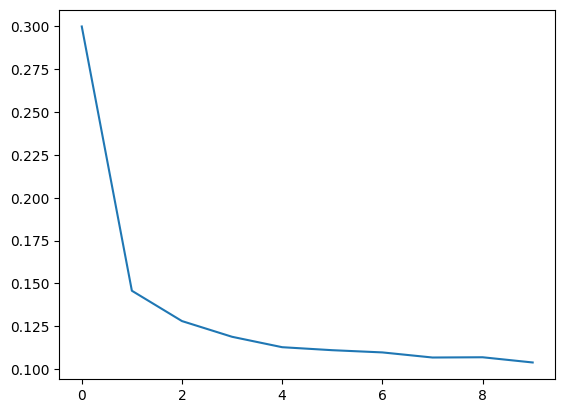

In [9]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

## Capacity

A model's capacity refers to the size and complexity of the patterns it is able to learn. 
> If it appears that your network is underfitting the data, you should try increasing its capacity.

In [10]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

## Early Stopping

when a model is too eagerly learning noise, the validation loss may start to increase during training. 

To prevent this, we can simply stop the training whenever it seems the validation loss isn't decreasing anymore.

## Adding Early Stopping

In Keras, we include early stopping in our training through a callback. 

A callback is just a function you want run every so often while the network trains. 

The early stopping callback will run after every epoch.

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

## Example - Train a Model with Early Stopping

In [12]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('E:\Coding\MachineLearning\CSVFile\\red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [13]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

After defining the callback, add it as an argument in fit

Choose a large number of epochs when using early stopping, more than you'll need.

Minimum validation loss: 0.09326832741498947


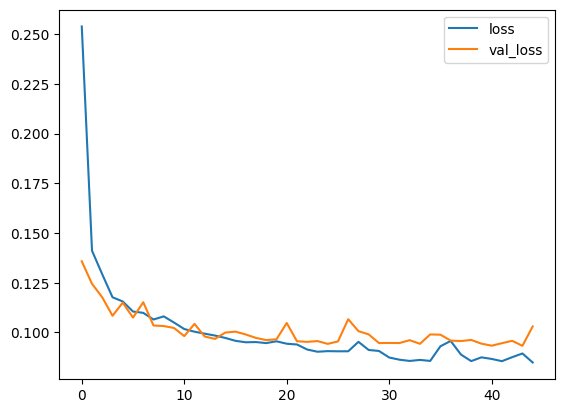

In [14]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

## Dropout

The first of these is the "dropout layer", which can help correct overfitting.

## Adding Dropout

In [15]:
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])

## Batch Normalization

The next special layer we'll look at performs "batch normalization" (or "batchnorm"), which can help correct training that is slow or unstable.

It seems that batch normalization can be used at almost any point in a network. You can put it after a layer...

In [16]:
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),

(<keras.layers.normalization.batch_normalization.BatchNormalization at 0x25d6ca4d7b0>,)

... or between a layer and its activation function:

In [17]:
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),

(<keras.layers.core.activation.Activation at 0x25d6ca4fb50>,)

## Example - Using Dropout and Batch Normalization

In [18]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


import pandas as pd
red_wine = pd.read_csv('E:\Coding\MachineLearning\CSVFile\\red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

C:\Users\PC\AppData\Local\Temp\ipykernel_16160\632250445.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


When adding dropout, you may need to increase the number of units in your Dense layers.

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

There's nothing to change this time in how we set up the training.

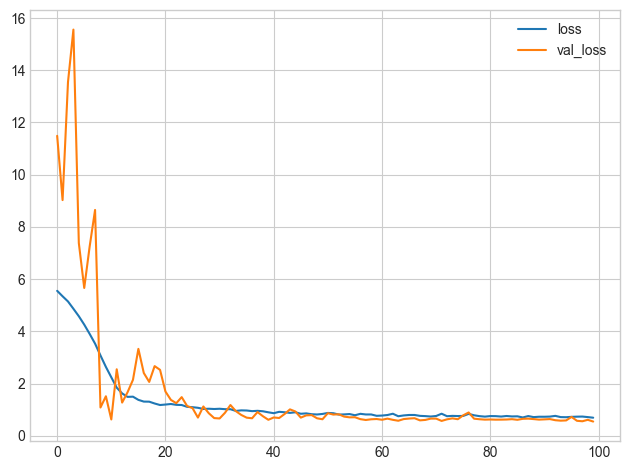

In [20]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();